#Item- Item based Collaborative Filtering 

> Here, top three Movies similar to a specified Movie are predicted using the cosine similarities between the Movies.
 



In [72]:
# Clone the entire repo.
!git clone -l -s https://github.com/AdarshKumar712/Recommendation_Engine.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (34/34), done.
/content/cloned-repo/cloned-repo/cloned-repo
LICENSE  MovieLen100k  MovieLen1M  README.md


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
#Reading the required csv files
Movies = pd.read_csv("./MovieLen1M/movies.dat", sep='::',header = None)
Ratings = pd.read_csv("./MovieLen1M/ratings.dat", sep='::',header = None)
Links = pd.read_csv("./MovieLen1M/users.dat", sep='::',header = None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [79]:
Movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [80]:
Movies.describe()

,0
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


Before moving further, we need to map the MovieIds to an increasing sequence of indexes which will be used as reference in the similarity matrix

In [0]:
#map MovieId with Sequence
Id_Map = {}
Reverse_Id_Map = {}
for i in range (0,len(Movies[0])):
  Id_Map[Movies[0][i]] = i
  Reverse_Id_Map[i] = Movies[0][i]

In [82]:
len(Id_Map)

3883

In [83]:
Ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [85]:
Links.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


##Simple Filtering Based on the Ratings given
Here, a rating matrix is created wrt the user and Movies where row represent user and column represent the Movies

In [0]:
Users = (Ratings[0].unique().shape[0])
Total_Movies  = (Movies[0].unique().shape[0])

In [98]:
Id_Map[Ratings.iloc[i,1]]

2179

In [0]:
Rating_matrix = np.zeros((Users+1,Total_Movies))

In [0]:
for i in range(0,len(Ratings[0])):
  Rating_matrix[Ratings.iloc[i,0],Id_Map[Ratings.iloc[i,1]]] = Ratings.iloc[i,2]

In [100]:
Rating_matrix
#Row_zero is the buffer

array([[0., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

###Item-item and User Item Similarity Matrices
First we need to normalize the rating matrix and then unrated matrices are given as zero rating, afterwards the Similarity matrix is created using Fast Similarity function. Related maths can be found in the link provied in the references.

In [0]:
cnts = np.sum((Rating_matrix>0),axis = 1)

In [0]:
rating_matrix = np.zeros((Users+1,Total_Movies))

In [0]:
mean = {}
for j in range(1,Users):
  mean[j] = np.sum(Rating_matrix[j,:])/cnts[j];
  #print(mean)
  for i in  range(0,Total_Movies):
    if (Rating_matrix[j,i]!=0):
      rating_matrix[j,i] = Rating_matrix[j,i]
      rating_matrix[j,i]-=mean[j]

In [104]:
rating_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.81132075, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
def fast_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [0]:
user_similarity = fast_similarity(rating_matrix, kind='user')
item_similarity = fast_similarity(rating_matrix, kind='item')

In [107]:
item_similarity

array([[ 1.00000000e+00, -5.15497762e-02, -5.88673820e-02, ...,
         1.11996696e-02,  1.98191095e-02,  3.75068055e-02],
       [-5.15497762e-02,  1.00000000e+00,  2.06822472e-02, ...,
        -2.77643420e-02, -1.43227878e-02, -2.70860076e-02],
       [-5.88673820e-02,  2.06822472e-02,  1.00000000e+00, ...,
         2.05272935e-03, -5.30215400e-04, -1.71746535e-02],
       ...,
       [ 1.11996696e-02, -2.77643420e-02,  2.05272935e-03, ...,
         1.00000000e+00,  6.30028263e-02,  3.32756719e-02],
       [ 1.98191095e-02, -1.43227878e-02, -5.30215400e-04, ...,
         6.30028263e-02,  1.00000000e+00,  8.84944762e-02],
       [ 3.75068055e-02, -2.70860076e-02, -1.71746535e-02, ...,
         3.32756719e-02,  8.84944762e-02,  1.00000000e+00]])

#Recommendation: Similar Items to a given item
Here we try to find similarities between the given movie and other movies in the list using the cosine similarities between the various items.

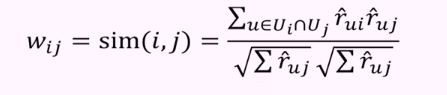

In [110]:
#Longer method: Taking similarity with each item 
x = int(input("Enter the movieId to which you want to search similar items: "))
y = Id_Map[x]
Movie_column = rating_matrix[:,y].reshape((-1,1))
Similarity_list = []
Square_matrix = np.sqrt(np.sum(rating_matrix*rating_matrix,axis = 0))
for i in range(0,Total_Movies):
    Movie_i = rating_matrix[:,i].reshape(-1,1)
    if (Square_matrix[i]*Square_matrix[y]==0):
      similarity = -1
    else:
      similarity = (Movie_column.T).dot(Movie_i)/(Square_matrix[i]*Square_matrix[y])
    Similarity_list.append(similarity)
Similarity_list = np.array(Similarity_list).reshape(-1,1)
Final = sorted(range(len(Similarity_list)), key=lambda i: Similarity_list[i])[-4:]
print("Top 3 Recommended films which are similar to given film are: ")
for i in range(0,3):
    print(Movies.iloc[Final[2-i],1])

Enter the movieId to which you want to search similar items: 5
Top 3 Recommended films which are similar to given film are: 
Sister Act 2: Back in the Habit (1993)
Home Alone 2: Lost in New York (1992)
Nine Months (1995)


In [111]:
#From the item_similarity Matrix
Similarity_list = item_similarity[y,:]
Final = sorted(range(len(Similarity_list)), key=lambda i: Similarity_list[i])[-4:]
print("Top 3 Recommended films which are similar to given film are: ")
for i in range(0,3):
    print(Movies.iloc[Final[2-i],:3])

Top 3 Recommended films which are similar to given film are: 
0                                      3248
1    Sister Act 2: Back in the Habit (1993)
2                                    Comedy
Name: 3179, dtype: object
0                                     2953
1    Home Alone 2: Lost in New York (1992)
2                        Children's|Comedy
Name: 2884, dtype: object
0                   186
1    Nine Months (1995)
2                Comedy
Name: 184, dtype: object


In [113]:
Movies.iloc[y,:]

0                                     5
1    Father of the Bride Part II (1995)
2                                Comedy
Name: 4, dtype: object

Here, suppose we want to find the movies which are similar to MovieId - 5 i.e. Father of the Bride Part II (1995). Our system recommends above three as the top three Movies which are most similar to MovieId-5. We can see here a fair similarity in the genres of the provided movie and the Movies predicted which is what should be, as movies with similar genres are often similar. All three of them are having genres : <U>Comedy</u> same as the movie Toy story(1995). Hence the items predicted are fairly similar to the provided item

#References:
https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/
